# MOVIELENS RECOMMENDATION SYSTEM

## Overview
The goal of this project is to build a recommendation model that provides the top 5 personalized movie recommendations to a user based on their past ratings, preferences and perception. By analyzing user preferences and comparing them with patterns in the ratings of other users or movies, the system aims to predict what a user would enjoy watching next.

Primarily, in this project we'll use Collaborative Filtering, and hybrid approach which will combine both content based and collaborative filtering for the recomendation system.

## Business Understanding



## Objectives



**1.




## Data understanding
The data seems to have been split between train and test data

In [5]:
#importing libraries to support in data understanding and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [6]:
# import the files
movies= pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')

In [13]:
# merge the csv files and rename user and timestamp columns as per table
df_merge = movies.merge(ratings, on="movieId")\
.merge(tags, on=("movieId"))
df_merge

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [27]:
df_merge = df_merge.rename(columns={
    'userId_x': 'userId_rating',
    'timestamp_x': 'timestamp_rating',
    'userId_y': 'userId_tag',
    'timestamp_y': 'timestamp_tag'
})

In [28]:
df_merge.shape

(233213, 9)

In [29]:
df_merge.tail()

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603
233212,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,remaster,1537098592


In [30]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movieId           233213 non-null  int64  
 1   title             233213 non-null  object 
 2   genres            233213 non-null  object 
 3   userId_rating     233213 non-null  int64  
 4   rating            233213 non-null  float64
 5   timestamp_rating  233213 non-null  int64  
 6   userId_tag        233213 non-null  int64  
 7   tag               233213 non-null  object 
 8   timestamp_tag     233213 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 16.0+ MB


In [31]:
df_merge.describe()

,movieId,userId_rating,rating,timestamp_rating,userId_tag,timestamp_tag
count,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,2.332130e+05
mean,12319.999443,309.688191,3.966535,1.213524e+09,470.683564,1.384774e+09
std,28243.919401,178.206387,0.968637,2.250448e+08,153.329632,1.534621e+08
min,1.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,156.000000,3.500000,1.017365e+09,424.000000,1.242494e+09
50%,1198.000000,309.000000,4.000000,1.217325e+09,477.000000,1.457901e+09
75%,4638.000000,460.000000,5.000000,1.443201e+09,599.000000,1.498457e+09
max,193565.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


In [32]:
# check for missing values
df_merge.isna().sum()

,0
movieId,0
title,0
genres,0
userId_rating,0
rating,0
timestamp_rating,0
userId_tag,0
tag,0
timestamp_tag,0


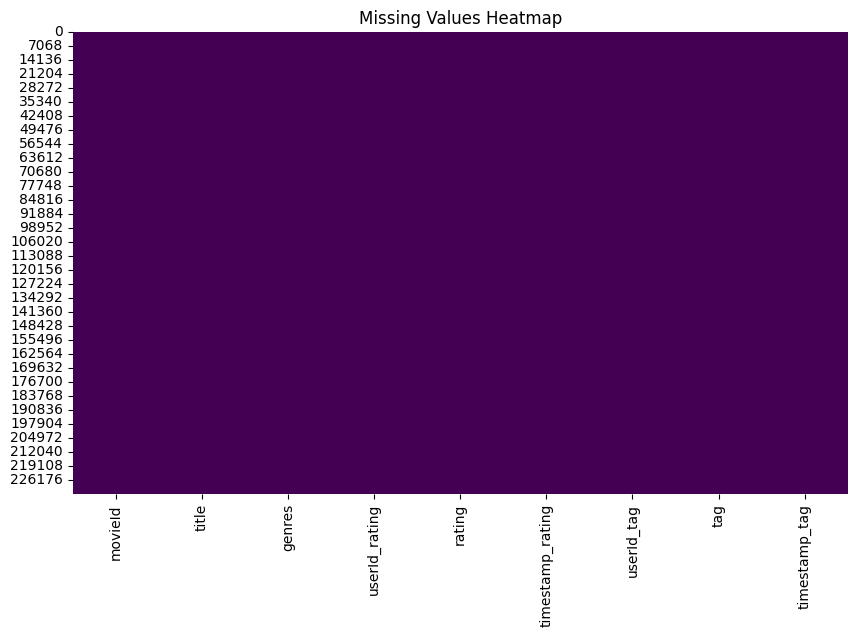

In [43]:
# missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_merge.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [33]:
# check duplicates
df_merge.duplicated().sum()

np.int64(0)

In [35]:
# check for outliers in the dataset
Q1 = df_merge['rating'].quantile(0.25)
Q3 = df_merge['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_merge[(df_merge['rating'] < lower_bound) | (df_merge['rating'] > upper_bound)]
outliers

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
78,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,336,pixar,1139045764
79,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,474,pixar,1137206825
80,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,567,fun,1525286013
741,2,Jumanji (1995),Adventure|Children|Fantasy,149,1.0,902084874,62,fantasy,1528843929
742,2,Jumanji (1995),Adventure|Children|Fantasy,149,1.0,902084874,62,magic board game,1528843932
...,...,...,...,...,...,...,...,...,...
233155,184471,Tomb Raider (2018),Action|Adventure|Fantasy,153,0.5,1525553051,62,Alicia Vikander,1528024914
233156,184471,Tomb Raider (2018),Action|Adventure|Fantasy,153,0.5,1525553051,62,video game adaptation,1528024898
233187,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,338,1.0,1530148465,62,Josh Brolin,1527274096
233188,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,338,1.0,1530148465,62,Ryan Reynolds,1527274092


In [36]:
df_merge.shape

(233213, 9)

In [37]:
# checking total count per rating
df_merge['rating'].value_counts()

,count
rating,
4.0,64781
5.0,63845
4.5,31502
3.0,28550
3.5,22895
2.0,7955
2.5,6488
1.0,3721
0.5,1908


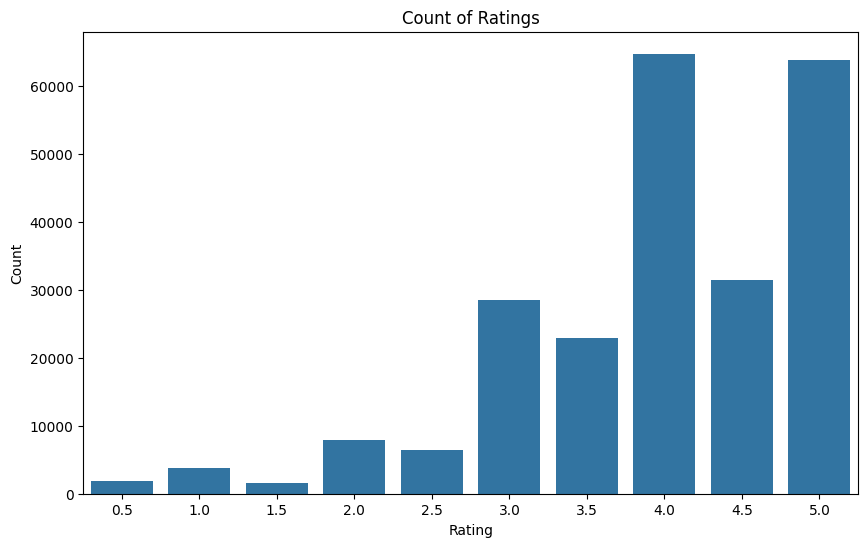

In [42]:
# visualize the counts
plt.figure(figsize=(10, 6))
sns.countplot(x=df_merge['rating'])
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

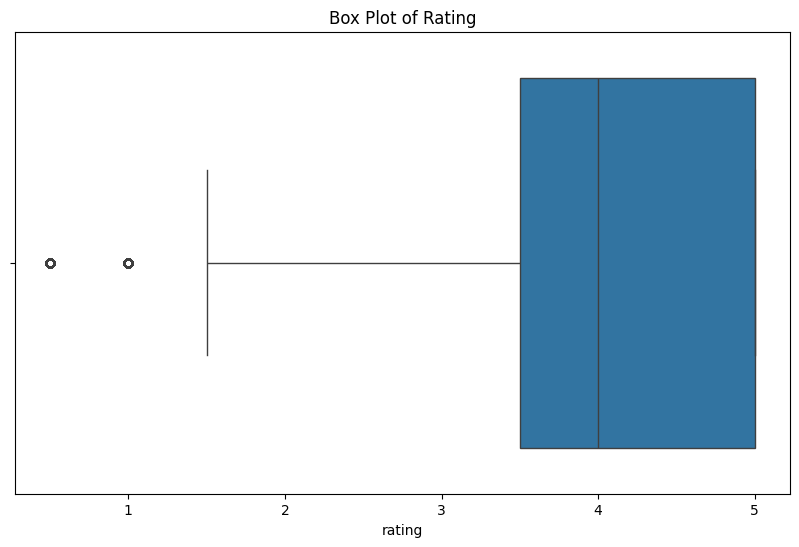

In [38]:
# plot outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merge['rating'])
plt.title('Box Plot of Rating')
plt.show()

In [39]:
# remove outliers
df_merge_cleaned = df_merge[(df_merge['rating'] >= lower_bound) & (df_merge['rating'] <= upper_bound)]
df_merge_cleaned

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


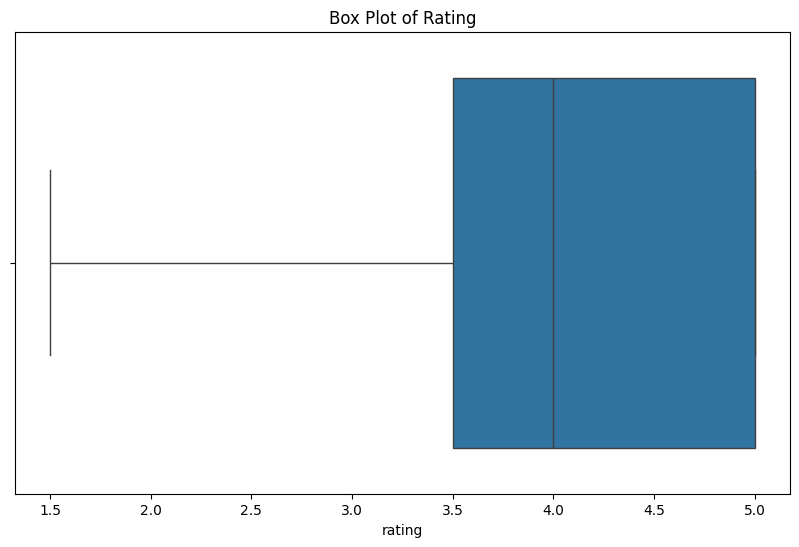

In [40]:
# plot the cleaned dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merge_cleaned['rating'])
plt.title('Box Plot of Rating')
plt.show()

In [41]:
df_merge_cleaned.shape

(227584, 9)

In [44]:
# Split the 'genres' column by '|', then explode
df_exploded = df_merge_cleaned.copy()
df_exploded['genres'] = df_exploded['genres'].str.split('|')
df_exploded = df_exploded.explode('genres').reset_index(drop=True)
df_exploded

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
0,1,Toy Story (1995),Adventure,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Animation,1,4.0,964982703,336,pixar,1139045764
2,1,Toy Story (1995),Children,1,4.0,964982703,336,pixar,1139045764
3,1,Toy Story (1995),Comedy,1,4.0,964982703,336,pixar,1139045764
4,1,Toy Story (1995),Fantasy,1,4.0,964982703,336,pixar,1139045764
...,...,...,...,...,...,...,...,...,...
747116,193565,Gintama: The Movie (2010),Sci-Fi,184,3.5,1537098554,184,gintama,1537098603
747117,193565,Gintama: The Movie (2010),Action,184,3.5,1537098554,184,remaster,1537098592
747118,193565,Gintama: The Movie (2010),Animation,184,3.5,1537098554,184,remaster,1537098592
747119,193565,Gintama: The Movie (2010),Comedy,184,3.5,1537098554,184,remaster,1537098592


#Data Cleaning

##Cleaning Training Data
Handling null values

Dropping duplicates



In [ ]:
df_merge.isna().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,3637
gps_height,0
installer,3655
longitude,0
latitude,0
wpt_name,2
num_private,0


In [ ]:
df_merge_null = df_merge.columns[df_merge.isna().sum() > 0]
df_merge_null

Index(['funder', 'installer', 'wpt_name', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')

In [ ]:
#Since scheme_name = scheme_management accordng to data description, we drop the data with the most null values
df_merge_drop = df_merge.drop(columns=['scheme_name'])
df_merge_drop.shape

(59400, 40)

In [ ]:
#viewing data in columns with null values
df_merge[['funder', 'installer', 'wpt_name', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit']].head()

,funder,installer,wpt_name,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,none,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Zahanati,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Kwa Mahundi,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Zahanati Ya Nanyumbu,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Shuleni,Kyanyamisa,True,NaN,NaN,True


In [ ]:
#viewing the difference between region and subvillage based on data description
df_merge[['region', 'subvillage']].nunique()

,0
region,21
subvillage,19287


In [ ]:
df_merge_clean=df_merge_drop.dropna()

In [ ]:
df_merge_clean.duplicated().sum()

0

In [ ]:
non_unique_cols = [col for col in df_merge_clean if df_merge_clean[col].nunique() == 1]

if non_unique_cols:
  print(non_unique_cols)



['recorded_by']


In [ ]:
df_merge_clean = df_merge_clean.drop(columns='recorded_by')

In [ ]:
df_merge_clean['date_recorded']=pd.to_datetime(df_merge_clean['date_recorded'])

In [ ]:
df_merge_clean['construction_year']=pd.to_datetime(df_merge_clean['construction_year']).dt.year

In [ ]:
df_merge_clean.dtypes

,0
id,int64
amount_tsh,float64
date_recorded,datetime64[ns]
funder,object
gps_height,int64
installer,object
longitude,float64
latitude,float64
wpt_name,object
num_private,int64


In [ ]:
(df_merge_clean['extraction_type'] == df_merge_clean['extraction_type_group']).all()

False

In [ ]:
df_merge_clean.nunique()

,0
id,48285
amount_tsh,91
date_recorded,324
funder,1586
gps_height,2426
installer,1787
longitude,46913
latitude,46915
wpt_name,31029
num_private,58


In [ ]:
#extraction_type, extraction_type_group, extraction_type_class all have the same column description
#keeping column with the highest number of unique values
df_merge_clean = df_merge_clean.drop(columns=['extraction_type_group','extraction_type_class'])

In [ ]:
#payment, payment_type,  all have the same column description
#keeping column with the least words
df_merge_clean = df_merge_clean.drop(columns=['payment'])

In [ ]:
#water_quality, quality_group,  all have the same column description
#keeping column that is most descriptive
df_merge_clean = df_merge_clean.drop(columns=['quality_group'])

In [ ]:
(df_merge_clean['quantity'] == df_merge_clean['quantity_group']).all()

True

In [ ]:
df_merge_clean = df_merge_clean.drop(columns=['quantity'])

In [ ]:
#source, source_type, source_class all have the same column description
#keeping column with the highest number of unique values
df_merge_clean = df_merge_clean.drop(columns=['source_type','source_class'])

In [ ]:
#waterpoint_type, waterpoint_type_group, all have the same column description
#keeping column with the highest number of unique values
df_merge_clean = df_merge_clean.drop(columns=['waterpoint_type_group'])

In [ ]:
df_merge_clean.shape

(48285, 31)

##Cleaning Testing Data
Handling null values

Dropping duplicates

In [ ]:
df_test.isna().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,870
gps_height,0
installer,877
longitude,0
latitude,0
wpt_name,0
num_private,0


In [ ]:
#viewing data in columns with null values
df_test[['funder', 'installer', 'wpt_name', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit']].head()

,funder,installer,wpt_name,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Dmdd,DMDD,Dinamu Secondary School,Magoma,True,Parastatal,NaN,True
1,Government Of Tanzania,DWE,Kimnyak,Kimnyak,True,VWC,TPRI pipe line,True
2,NaN,NaN,Puma Secondary,Msatu,True,VWC,P,NaN
3,Finn Water,FINN WATER,Kwa Mzee Pange,Kipindimbi,NaN,VWC,NaN,True
4,Bruder,BRUDER,Kwa Mzee Turuka,Losonga,NaN,Water Board,BRUDER,True


In [ ]:
dropped_columns = list(set(df_merge.columns) - set(df_merge_clean.columns))
dropped_columns

['source_class',
 'payment',
 'extraction_type_class',
 'waterpoint_type_group',
 'scheme_name',
 'quality_group',
 'quantity',
 'source_type',
 'extraction_type_group',
 'recorded_by']

In [ ]:
#dropping all columns dropped in the training data
df_test_clean=df_test.copy()
df_test_clean = df_test_clean.drop(columns=['quantity',
 'payment',
 'quality_group',
 'source_type',
 'source_class',
 'extraction_type_class',
 'extraction_type_group','scheme_name',
 'recorded_by',
 'waterpoint_type_group'])

In [ ]:
df_test_clean.shape

(14850, 30)

In [ ]:
df_test_clean['date_recorded']=pd.to_datetime(df_test_clean['date_recorded'])

In [ ]:
df_test_clean.isna().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,870
gps_height,0
installer,877
longitude,0
latitude,0
wpt_name,0
num_private,0


In [ ]:
df_test_clean = df_test_clean.dropna()
df_test_clean.shape

(12097, 30)

#Exploratory Data Analysis

##Correlation Heatmap

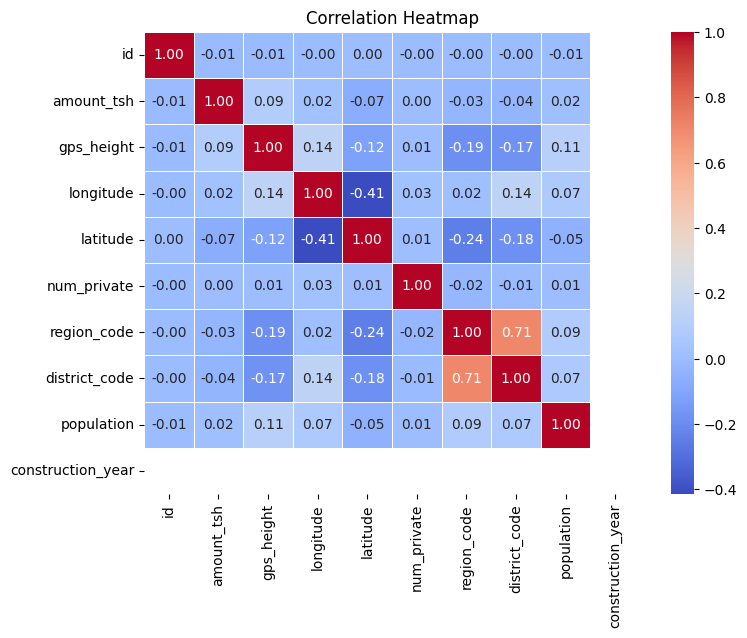

In [ ]:
#plotting a correlation map
corr_matrix = df_merge_clean.select_dtypes(include=['int','float']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
unique_values = df_merge_clean['status_group'].value_counts()
unique_values

,count
status_group,
functional,26516
non functional,18271
functional needs repair,3498


# Preprocessing

### Encoding

In [ ]:
#identifying the columns and the unique features
df_merge_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48285 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 48285 non-null  int64         
 1   amount_tsh         48285 non-null  float64       
 2   date_recorded      48285 non-null  datetime64[ns]
 3   funder             48285 non-null  object        
 4   gps_height         48285 non-null  int64         
 5   installer          48285 non-null  object        
 6   longitude          48285 non-null  float64       
 7   latitude           48285 non-null  float64       
 8   wpt_name           48285 non-null  object        
 9   num_private        48285 non-null  int64         
 10  basin              48285 non-null  object        
 11  subvillage         48285 non-null  object        
 12  region             48285 non-null  object        
 13  region_code        48285 non-null  int64         
 14  district_co

In [ ]:
# getting the numeric cols and the categorical cols
num_original_columns = df_merge_clean.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_merge_clean.select_dtypes(exclude=np.number).columns.tolist()

print("Categorical columns:", categorical_cols)
num_original_columns

Categorical columns: ['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'management', 'management_group', 'payment_type', 'water_quality', 'quantity_group', 'source', 'waterpoint_type', 'status_group']


['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [ ]:
df_merge_clean[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 48285 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_recorded      48285 non-null  datetime64[ns]
 1   funder             48285 non-null  object        
 2   installer          48285 non-null  object        
 3   wpt_name           48285 non-null  object        
 4   basin              48285 non-null  object        
 5   subvillage         48285 non-null  object        
 6   region             48285 non-null  object        
 7   lga                48285 non-null  object        
 8   ward               48285 non-null  object        
 9   public_meeting     48285 non-null  object        
 10  scheme_management  48285 non-null  object        
 11  permit             48285 non-null  object        
 12  extraction_type    48285 non-null  object        
 13  management         48285 non-null  object        
 14  management_

In [ ]:
# Converting 'year' to integer
df_merge_encoded=df_merge_clean.copy()
df_merge_encoded['date_recorded'] = df_merge_encoded['date_recorded'].dt.year
df_merge_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48285 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 48285 non-null  int64  
 1   amount_tsh         48285 non-null  float64
 2   date_recorded      48285 non-null  int32  
 3   funder             48285 non-null  object 
 4   gps_height         48285 non-null  int64  
 5   installer          48285 non-null  object 
 6   longitude          48285 non-null  float64
 7   latitude           48285 non-null  float64
 8   wpt_name           48285 non-null  object 
 9   num_private        48285 non-null  int64  
 10  basin              48285 non-null  object 
 11  subvillage         48285 non-null  object 
 12  region             48285 non-null  object 
 13  region_code        48285 non-null  int64  
 14  district_code      48285 non-null  int64  
 15  lga                48285 non-null  object 
 16  ward               48285 no

In [ ]:
# Converting 'year' to integer
df_test_encoded = df_test_clean.copy()
df_test_encoded['date_recorded'] = df_test_encoded['date_recorded'].dt.year
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 14849
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12097 non-null  int64  
 1   amount_tsh         12097 non-null  float64
 2   date_recorded      12097 non-null  int32  
 3   funder             12097 non-null  object 
 4   gps_height         12097 non-null  int64  
 5   installer          12097 non-null  object 
 6   longitude          12097 non-null  float64
 7   latitude           12097 non-null  float64
 8   wpt_name           12097 non-null  object 
 9   num_private        12097 non-null  int64  
 10  basin              12097 non-null  object 
 11  subvillage         12097 non-null  object 
 12  region             12097 non-null  object 
 13  region_code        12097 non-null  int64  
 14  district_code      12097 non-null  int64  
 15  lga                12097 non-null  object 
 16  ward               12097 no

In [ ]:
#having an overview of unique values in the categorical columns to determine type of encoding
for i in categorical_cols:
  print(f'The variable "{i}" has {df_merge_encoded[i].nunique()} variables: {df_merge_encoded[i].unique()} \n')

The variable "date_recorded" has 5 variables: [2011 2013 2012 2004 2002] 

The variable "funder" has 1586 variables: ['Roman' 'Lottery Club' 'Unicef' ... 'Wanginyi Water'
 'Dwe/anglican Church' 'Brown'] 

The variable "installer" has 1787 variables: ['Roman' 'World vision' 'UNICEF' ... 'DWE/Anglican church' 'brown'
 'SELEPTA'] 

The variable "wpt_name" has 31029 variables: ['none' 'Kwa Mahundi' 'Zahanati Ya Nanyumbu' ... 'Kwa Yahona Kuvala'
 'Mshoro' 'Kwa Mzee Lugawa'] 

The variable "basin" has 9 variables: ['Lake Nyasa' 'Pangani' 'Ruvuma / Southern Coast' 'Internal'
 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa' 'Lake Victoria'] 

The variable "subvillage" has 16183 variables: ['Mnyusi B' 'Majengo' 'Mahakamani' ... 'Itete B' 'Maore Kati'
 'Kikatanyemba'] 

The variable "region" has 21 variables: ['Iringa' 'Manyara' 'Mtwara' 'Tanga' 'Shinyanga' 'Tabora' 'Pwani' 'Ruvuma'
 'Kilimanjaro' 'Rukwa' 'Kigoma' 'Lindi' 'Dodoma' 'Mbeya' 'Arusha' 'Mwanza'
 'Kagera' 'Singida' 'Morogoro' 'M

####Label Encoding
Selecting public_meeting and permit independent variables that are binary

In [ ]:
#Label encoding for train x data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_merge_encoded['public_meeting_le']=encoder.fit_transform(df_merge_encoded['public_meeting'])
df_merge_encoded['permit_le']=encoder.fit_transform(df_merge_encoded['permit'])
df_merge_encoded['status_group_e']=encoder.fit_transform(df_merge_encoded['status_group'])

df_merge_encoded.drop(columns=['public_meeting','permit','status_group'], inplace=True)

In [ ]:
#Label encoding for test x data

encoder = LabelEncoder()
df_test_encoded['public_meeting_le']=encoder.fit_transform(df_test_encoded['public_meeting'])
df_test_encoded['permit_le']=encoder.fit_transform(df_test_encoded['permit'])

df_test_encoded.drop(columns=['public_meeting','permit'], inplace=True)

####Frequency Encoding
Selecting region,iga, ward,funder,installer,wpt_name, subvillage and region code independent variables due to high cardinality

In [ ]:
#frequency encoding for train data
fe_columns =['region','lga','ward','funder','installer','wpt_name','subvillage','region_code','district_code']

for col in fe_columns:
  freq_map = df_merge_encoded[col].value_counts(normalize=True)
  df_merge_encoded[col + '_fe'] = df_merge_encoded[col].map(freq_map)

df_merge_encoded.drop(columns=['region','lga','ward','funder','installer','wpt_name','subvillage','region_code','district_code'], inplace=True)

In [ ]:
#frequency encoding for test data
fe_columns =['region','lga','ward','funder','installer','wpt_name','subvillage','region_code','district_code']

for col in fe_columns:
  freq_map = df_test_encoded[col].value_counts(normalize=True)
  df_test_encoded[col + '_fe'] = df_test_encoded[col].map(freq_map)

df_test_encoded.drop(columns=['region','lga','ward','funder','installer','wpt_name','subvillage','region_code','district_code'], inplace=True)

####One Hot Encoding
Selecting scheme_management,extraction_type, management, management_group, payment_type, water_quality, quantity_group, source,basin and waterpoint_type independent variables due to their high categorical nature

In [ ]:
#One Hot encoding for train x data
ohe_columns = ['scheme_management','extraction_type', 'management', 'management_group',
                  'payment_type', 'water_quality', 'quantity_group', 'source', 'waterpoint_type','basin']

df_merge_encoded = pd.get_dummies(df_merge_encoded,columns=ohe_columns,drop_first=True)

In [ ]:
#One Hot encoding for test x data
ohe_columns = ['scheme_management','extraction_type', 'management', 'management_group',
                  'payment_type', 'water_quality', 'quantity_group', 'source', 'waterpoint_type','basin']

df_test_encoded = pd.get_dummies(df_test_encoded,columns=ohe_columns,drop_first=True)

In [ ]:
df_merge_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48285 entries, 0 to 59399
Columns: 103 entries, id to basin_Wami / Ruvu
dtypes: bool(82), float64(12), int32(2), int64(7)
memory usage: 11.5 MB


In [ ]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 14849
Columns: 101 entries, id to basin_Wami / Ruvu
dtypes: bool(81), float64(12), int32(1), int64(7)
memory usage: 2.8 MB


In [ ]:
missing_in_dftest = set(df_merge_encoded.columns) - set(df_test_encoded.columns)
missing_in_dftest

{'extraction_type_other - mkulima/shinyanga', 'status_group_e'}

In [ ]:
df_test_encoded = df_test_encoded.reindex(columns=df_merge_encoded.columns, fill_value=0)
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 14849
Columns: 103 entries, id to basin_Wami / Ruvu
dtypes: bool(81), float64(12), int32(1), int64(9)
memory usage: 3.0 MB


In [ ]:
column_name = "extraction_type_other - mkulima/shinyanga"

if column_name in df_test_encoded.columns:
    print(f"'{column_name}' exists in the DataFrame.")
else:
    print(f" '{column_name}' is missing from the DataFrame.")

'extraction_type_other - mkulima/shinyanga' exists in the DataFrame.


### Scaling
1. Identify what type of scaling to be done based on the type of model
2. Identify distribution of data, check for outliers, check for skewness


Models selected are;
1. Logistic Regression
2. Gradient Boost
3. Random Forest
4. Decision Trees
5. Support Vector Machine
6. K Nearest Neighbour


####Identifying data properties
i.e. outliers, skewness, distribution

In [ ]:
#checking for outliers
import numpy as np

df_numeric = df_merge_encoded.select_dtypes(include=['number'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print(outliers.sort_values(ascending=False))

wpt_name_fe          10116
amount_tsh            9535
funder_fe             8080
subvillage_fe         7683
public_meeting_le     4348
population            3617
ward_fe               3232
lga_fe                2455
longitude             1326
num_private            721
date_recorded           21
id                       0
region_code_fe           0
installer_fe             0
permit_le                0
region_fe                0
status_group_e           0
construction_year        0
latitude                 0
gps_height               0
district_code_fe         0
dtype: int64


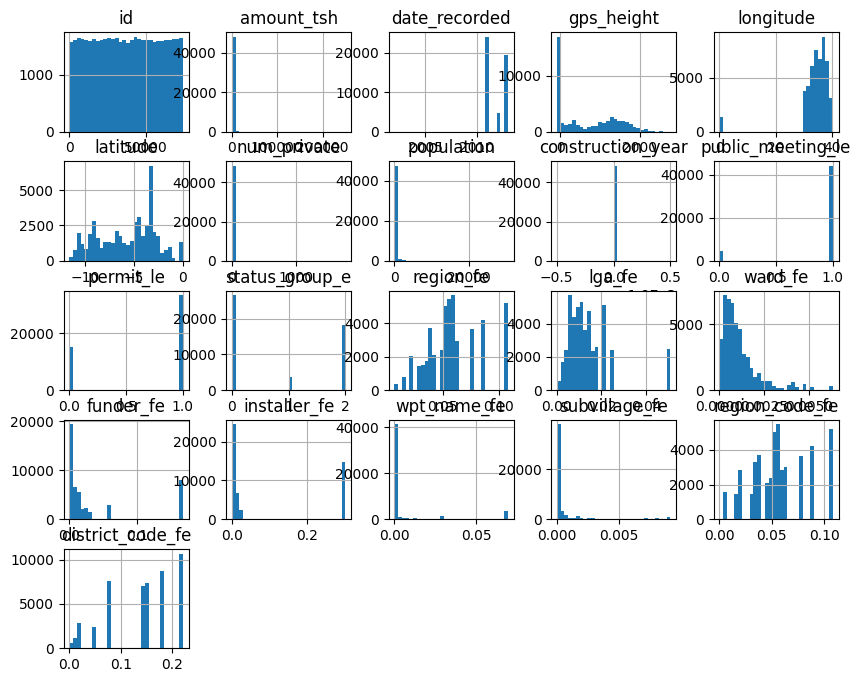

In [ ]:
#checking distribution of data
df_merge_encoded.iloc[:, :500].hist(figsize=(10, 8), bins=30)  # Checking first 5 columns
plt.show()

In [ ]:
from scipy.stats import shapiro, normaltest
def check_normality(df, alpha=0.05):
    normal_cols = []
    non_normal_cols = []

    for col in df_merge_encoded.select_dtypes(include=['float64', 'int64']).columns:
        data = df_merge_encoded[col].dropna()


        stat, p = normaltest(data)

        if p > alpha:
            normal_cols.append(col)
        else:
            non_normal_cols.append(col)

    return normal_cols, non_normal_cols


normal_cols, non_normal_cols = check_normality(df_merge_encoded)


print("Normally Distributed Columns:\n", normal_cols)
print("\nNon-Normally Distributed Columns:\n", non_normal_cols)

Normally Distributed Columns:
 []

Non-Normally Distributed Columns:
 ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'public_meeting_le', 'permit_le', 'status_group_e', 'region_fe', 'lga_fe', 'ward_fe', 'funder_fe', 'installer_fe', 'wpt_name_fe', 'subvillage_fe', 'region_code_fe', 'district_code_fe']


In [ ]:
def categorize_skewness(df):
    skew_categories = {
        "Right Skewed": [],
        "Moderate Right Skewed": [],
        "Normal": [],
        "Moderate Left Skewed": [],
        "Left Skewed": []
    }


    excluded_suffixes = ('_fe', '_le')
    numeric_cols = [col for col in df_merge_encoded.select_dtypes(include=['number']).columns if not col.endswith(excluded_suffixes)]


    skewness_values = df_merge_encoded[numeric_cols].skew()

    for col, skew in skewness_values.items():
        if skew > 1.5:
            skew_categories["Right Skewed"].append(col)
        elif 1 < skew <= 1.5:
            skew_categories["Moderate Right Skewed"].append(col)
        elif -1 <= skew <= 1:
            skew_categories["Normal"].append(col)
        elif -1.5 <= skew < -1:
            skew_categories["Moderate Left Skewed"].append(col)
        elif skew < -1.5:
            skew_categories["Left Skewed"].append(col)

    return skew_categories


skew_results = categorize_skewness(df_merge_encoded)
for category, cols in skew_results.items():
    print(f"{category}: {cols}")

Right Skewed: ['amount_tsh', 'num_private', 'population']
Moderate Right Skewed: []
Normal: ['id', 'date_recorded', 'gps_height', 'latitude', 'construction_year', 'status_group_e']
Moderate Left Skewed: []
Left Skewed: ['longitude']


In [ ]:
#skewness for test x data
def categorize_skewness(df):
    skew_categories = {
        "Right Skewed": [],
        "Moderate Right Skewed": [],
        "Normal": [],
        "Moderate Left Skewed": [],
        "Left Skewed": []
    }


    excluded_suffixes = ('_fe', '_le')
    numeric_cols = [col for col in df_test_encoded.select_dtypes(include=['number']).columns if not col.endswith(excluded_suffixes)]

# Calculate skewness for each column
    skewness_values = df_test_encoded[numeric_cols].skew()

    for col, skew in skewness_values.items():
        if skew > 1.5:
            skew_categories["Right Skewed"].append(col)
        elif 1 < skew <= 1.5:
            skew_categories["Moderate Right Skewed"].append(col)
        elif -1 <= skew <= 1:
            skew_categories["Normal"].append(col)
        elif -1.5 <= skew < -1:
            skew_categories["Moderate Left Skewed"].append(col)
        elif skew < -1.5:
            skew_categories["Left Skewed"].append(col)

    return skew_categories


skew_results = categorize_skewness(df_test_encoded)
for category, cols in skew_results.items():
    print(f"{category}: {cols}")

Right Skewed: ['amount_tsh', 'num_private', 'population']
Moderate Right Skewed: []
Normal: ['id', 'date_recorded', 'gps_height', 'latitude', 'construction_year', 'status_group_e', 'extraction_type_other - mkulima/shinyanga']
Moderate Left Skewed: []
Left Skewed: ['longitude']


columns with frequency encoding have introduced skewness however we can just apply Standard Scaler directly

In [ ]:
#finding columns with high outliers train x data
def find_outlier_columns(df_merge_encoded, threshold=0.05):


    outlier_cols = []
    num_rows = df_merge_encoded.shape[0]

    for col in df_merge_encoded.select_dtypes(include=['number']).columns:
        Q1 = df_merge_encoded[col].quantile(0.25)
        Q3 = df_merge_encoded[col].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        outliers = ((df_merge_encoded[col] < lower_bound) | (df_merge_encoded[col] > upper_bound)).sum()
        outlier_fraction = outliers / num_rows

        if outlier_fraction > threshold:
            outlier_cols.append(col)

    return outlier_cols


outlier_columns = find_outlier_columns(df_merge_encoded, threshold=0.05)
print("Columns with many outliers:", outlier_columns)

Columns with many outliers: ['amount_tsh', 'population', 'public_meeting_le', 'lga_fe', 'ward_fe', 'funder_fe', 'wpt_name_fe', 'subvillage_fe']


In [ ]:
#finding columns with high outliers test x data
def find_outlier_columns(df_test_encoded, threshold=0.05):


    outlier_cols = []
    num_rows = df_test_encoded.shape[0]

    for col in df_test_encoded.select_dtypes(include=['number']).columns:
        Q1 = df_test_encoded[col].quantile(0.25)
        Q3 = df_test_encoded[col].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        outliers = ((df_test_encoded[col] < lower_bound) | (df_test_encoded[col] > upper_bound)).sum()
        outlier_fraction = outliers / num_rows

        if outlier_fraction > threshold:
            outlier_cols.append(col)

    return outlier_cols


outlier_columns = find_outlier_columns(df_test_encoded, threshold=0.05)
print("Columns with many outliers:", outlier_columns)

Columns with many outliers: ['amount_tsh', 'population', 'public_meeting_le', 'lga_fe', 'funder_fe', 'wpt_name_fe', 'subvillage_fe']


Due to large number of outliers, robust scaler is recommended for columns that have not been encoded i.e. amount_tsh and population

####Robust and Standard Scaling

In [ ]:
#scaling train x data
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

df_merge_scaled = df_merge_encoded.copy()

X =df_merge_scaled.drop(columns = ['id','date_recorded','status_group_e'])
y = df_merge_scaled['status_group_e']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

robust_cols = ['amount_tsh', 'population','num_private']
standard_cols = [col for col in X_train.columns if col not in robust_cols]

# Applying RobustScaler to selected columns
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train[robust_cols])
X_test_robust= robust_scaler.fit_transform(X_test[robust_cols])

# Applying StandardScaler to the remaining columns
standard_scaler = StandardScaler()
X_train_standard= standard_scaler.fit_transform(X_train[standard_cols])
X_test_standard= robust_scaler.fit_transform(X_test[standard_cols])

X_train_scaled = pd.DataFrame(np.hstack((X_train_robust, X_train_standard)),
                              columns=robust_cols + standard_cols)

X_test_scaled = pd.DataFrame(np.hstack((X_test_robust, X_test_standard)),
                             columns=robust_cols + standard_cols)



X_train_scaled

,amount_tsh,population,num_private,gps_height,longitude,latitude,construction_year,public_meeting_le,permit_le,region_fe,...,waterpoint_type_improved spring,waterpoint_type_other,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu
0,0.0,-0.150,0.0,-1.004609,-0.344520,0.277306,0.0,0.312667,0.670090,-0.856663,...,-0.116927,-0.326104,-0.27348,-0.226311,2.743909,-0.422674,-0.464612,-0.378613,-0.287865,-0.343086
1,1.0,20.890,0.0,-0.868622,0.791893,-0.492238,0.0,-3.198292,-1.492336,-0.316043,...,-0.116927,-0.326104,-0.27348,-0.226311,-0.364444,-0.422674,-0.464612,-0.378613,-0.287865,2.914717
2,20.0,-0.145,0.0,-0.118546,0.421787,-1.932584,0.0,0.312667,-1.492336,-0.638865,...,-0.116927,-0.326104,-0.27348,-0.226311,-0.364444,-0.422674,-0.464612,-0.378613,3.473854,-0.343086
3,0.0,0.025,0.0,0.340946,0.501852,0.828550,0.0,-3.198292,0.670090,1.160333,...,-0.116927,-0.326104,-0.27348,-0.226311,-0.364444,-0.422674,2.152335,-0.378613,-0.287865,-0.343086
4,10.0,2.350,0.0,0.864854,-0.035164,0.927622,0.0,0.312667,-1.492336,0.707520,...,-0.116927,-0.326104,-0.27348,-0.226311,-0.364444,2.365891,-0.464612,-0.378613,-0.287865,-0.343086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38623,0.0,1.100,0.0,0.975075,-0.538832,0.943789,0.0,0.312667,-1.492336,-0.071558,...,-0.116927,-0.326104,-0.27348,-0.226311,2.743909,-0.422674,-0.464612,-0.378613,-0.287865,-0.343086
38624,0.0,-0.150,0.0,-1.004609,-0.196283,-0.982713,0.0,0.312667,0.670090,-0.139566,...,-0.116927,-0.326104,-0.27348,4.418707,-0.364444,-0.422674,-0.464612,-0.378613,-0.287865,-0.343086
38625,10.0,0.130,0.0,1.179771,0.082701,-1.099101,0.0,0.312667,0.670090,2.034106,...,-0.116927,-0.326104,-0.27348,-0.226311,-0.364444,-0.422674,-0.464612,2.641221,-0.287865,-0.343086
38626,20.0,1.350,0.0,-0.562293,0.338323,-1.073837,0.0,0.312667,0.670090,0.082536,...,-0.116927,-0.326104,-0.27348,-0.226311,-0.364444,-0.422674,-0.464612,2.641221,-0.287865,-0.343086


In [ ]:
X_test_scaled

,amount_tsh,population,num_private,gps_height,longitude,latitude,construction_year,public_meeting_le,permit_le,region_fe,...,waterpoint_type_improved spring,waterpoint_type_other,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu
0,0.0,-0.125,0.0,-0.350376,-0.177683,0.302437,0.0,0.0,0.0,0.578645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.125,0.0,-0.350376,-0.463677,-0.838118,0.0,0.0,-1.0,-0.050512,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.875,0.0,0.899248,0.358518,0.350763,0.0,0.0,0.0,0.039642,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,-0.125,0.0,-0.350376,-0.428500,0.049607,0.0,-1.0,-1.0,-0.583120,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.375,0.0,0.887970,0.534666,0.350981,0.0,0.0,0.0,0.914962,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,0.0,-0.125,0.0,-0.350376,0.271587,-0.327866,0.0,0.0,0.0,-0.603581,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9653,0.0,6.375,0.0,0.824812,-1.230782,0.090189,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9654,0.0,-0.125,0.0,-0.350376,0.236939,-0.241967,0.0,0.0,0.0,-0.603581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9655,0.0,19.875,0.0,-0.300000,0.945177,-0.415377,0.0,0.0,-1.0,-0.181586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modeling

### Classification

#### Logistic Regression

##### Base Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score


log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

Accuracy: 0.5811
Recall: 0.45392107753607
Precision: 0.557375038023217
F1-score: 0.43705019098817627

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.50      0.59      5285
           1       0.45      0.06      0.11       721
           2       0.49      0.80      0.61      3651

    accuracy                           0.58      9657
   macro avg       0.56      0.45      0.44      9657
weighted avg       0.62      0.58      0.56      9657


Confusion Matrix:
 [[2649   39 2597]
 [ 255   44  422]
 [ 717   15 2919]]


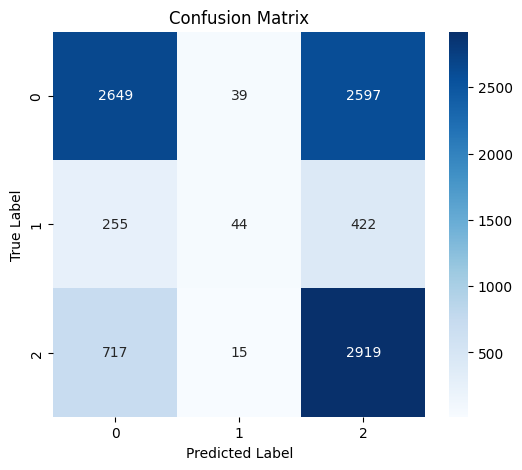

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The base model has performed poorly with an average overall performance of 61% accuracy,
precision of 46% , recall of 49% and f1-score of 47%. This below half which means the modeling is not accurate at all.

From the classification report we see that class 0 having the highest weight has better predictability than class 1 and 2.
Class 1 has very low performance due to class imbalance, therefore some feature selection or class balancing should be performed

From the confusion matrix, the class 0 is being confused with class 2 due to closeness in weights.

In general this model is not reliable and needs tuning


##### Tuned Model

Accuracy: 0.4114
Recall: 0.48373924959112163
Precision: 0.44420816877610486
F1-score: 0.36100074975092705
Confusion Matrix:
 [[ 905 2130 2250]
 [  70  395  256]
 [ 333  645 2673]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.17      0.27      5285
           1       0.12      0.55      0.20       721
           2       0.52      0.73      0.61      3651

    accuracy                           0.41      9657
   macro avg       0.44      0.48      0.36      9657
weighted avg       0.58      0.41      0.39      9657



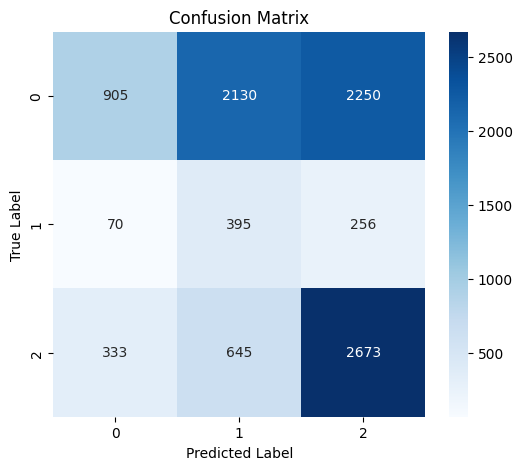

In [ ]:
#Applying SMOTE to tune the model
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=3, weights=[0.1, 0.9, 0.2],
                           n_samples=5000, n_features=100,  # Keep all 100 features
                           n_informative=6, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


log_reg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)


y_pred = log_reg.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The SMOTE method does not seem to improve the model has lower performance on all metrics
Feature selection may help improve the model

ANOVA Selected Features: ['region_fe', 'lga_fe', 'ward_fe', 'region_code_fe', 'extraction_type_gravity', 'extraction_type_other', 'payment_type_never pay', 'quantity_group_enough', 'waterpoint_type_communal standpipe', 'waterpoint_type_other']
ANOVA Logistic Regression Accuracy: 0.6293880086983535
Recall: 0.48373924959112163
Precision: 0.44420816877610486
F1-score: 0.36100074975092705
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      5285
           1       0.00      0.00      0.00       721
           2       0.56      0.65      0.61      3651

    accuracy                           0.63      9657
   macro avg       0.41      0.45      0.43      9657
weighted avg       0.59      0.63      0.61      9657



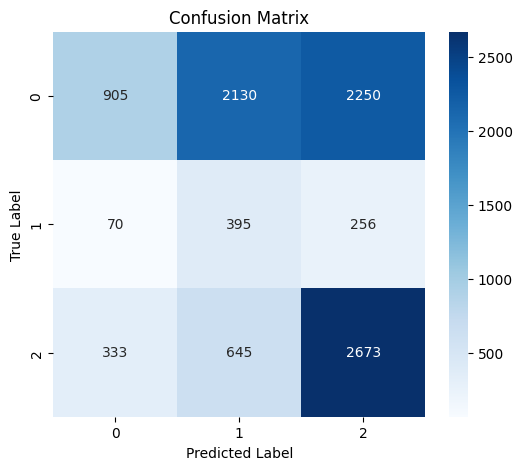

In [ ]:
#Feature selction using SelectK Best Anova Method
from sklearn.feature_selection import SelectKBest, f_classif,RFE


anova_selector = SelectKBest(score_func=f_classif, k=10)
X_train_anova = anova_selector.fit_transform(X_train_scaled, y_train)
X_test_anova = anova_selector.transform(X_test_scaled)

anova_columns =  X_train_scaled.columns[anova_selector.get_support()]
print("ANOVA Selected Features:", anova_columns.tolist())

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_anova, y_train)
y_pred_anova = log_reg.predict(X_test_anova)

recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print("ANOVA Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_anova))
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(classification_report(y_test, y_pred_anova))

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

ANOVA seems to have a slightly improved metrics especially on accuracy but this does not seem like a good measure to focus on since the precision, accuracy and recall are still below 50% however it performs way better than the SMOTE

Therefore Logistic Regression does not seem to be a good model fit for this dataset.
Reason being it is used to work on simpler datasets with fewer features

Tune the logistic model

#### K-NN model

##### Base model

KNN Accuracy: 0.6358082220151186
Recall: 0.48373924959112163
Precision: 0.44420816877610486
F1-score: 0.36100074975092705
Confusion Matrix:
 [[4332   79  874]
 [ 481   71  169]
 [1839   75 1737]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.73      5285
           1       0.32      0.10      0.15       721
           2       0.62      0.48      0.54      3651

    accuracy                           0.64      9657
   macro avg       0.53      0.46      0.47      9657
weighted avg       0.62      0.64      0.61      9657



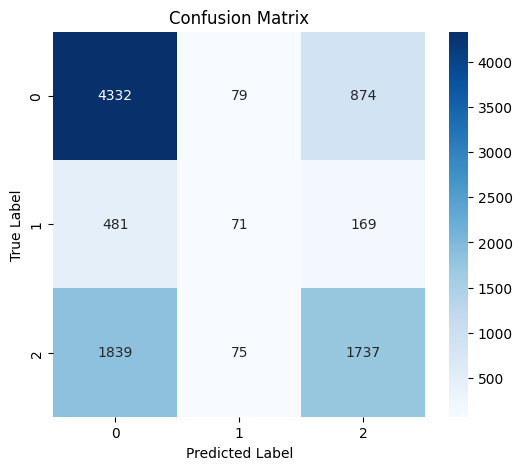

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=21)


knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


The KNN model seems to be performing similar to the Logistic Regression Model with feature selection from ANOVA.
The values of accuracy being 63%, precision 46%, recall 51%, f1 score 47% on an average basis

In terms of the individual performance we see an improvement on the class 1 performance with atleast a 15% performance as compared to the ANOVA Logistic Regression which was 0% however this is still not satisfactory

In terms of the confusion matrix, the model still confuses a lot of class 2 and class 0 predictions but has much better performance than Logistic Regression. This may be due to the use of a higher K which improves the classification






##### Tuned model

In [ ]:
#selecting best K through cross validation
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


k_values = range(1, 50, 4)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"Best K: {best_k}")

Best K: 5


KNN Accuracy: 0.6178937558247903
Recall: 0.4646375806127752
Precision: 0.5305361371355911
F1-score: 0.4720373797936029
Confusion Matrix:
 [[4020  169 1096]
 [ 467   90  164]
 [1665  129 1857]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70      5285
           1       0.23      0.12      0.16       721
           2       0.60      0.51      0.55      3651

    accuracy                           0.62      9657
   macro avg       0.49      0.46      0.47      9657
weighted avg       0.60      0.62      0.60      9657



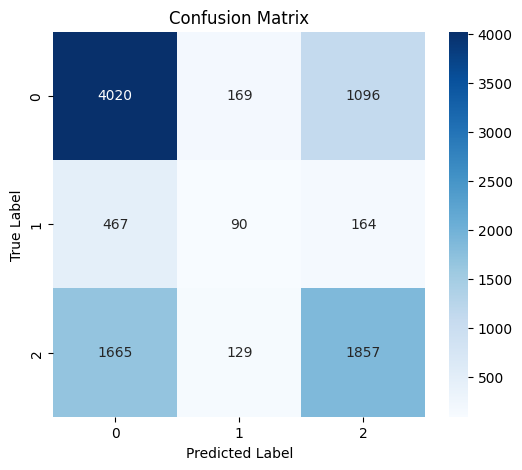

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

K=5 seems to be performing worse than K = 21 but it may be the best K which avoids over or under fitting and gives the balance between variance and bias.

We may need to do feature selection to improve the model



Accuracy: 0.6179
Recall: 0.46469924435785703
Precision: 0.49372331850109524
F1-score: 0.4713496007625198
Confusion Matrix:
 [[4020  169 1096]
 [ 467   90  164]
 [1665  129 1857]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70      5285
           1       0.23      0.12      0.16       721
           2       0.60      0.51      0.55      3651

    accuracy                           0.62      9657
   macro avg       0.49      0.46      0.47      9657
weighted avg       0.60      0.62      0.60      9657

Selected Features: ['region_fe', 'region_code_fe', 'extraction_type_gravity', 'extraction_type_other', 'payment_type_never pay', 'quantity_group_enough', 'waterpoint_type_other']


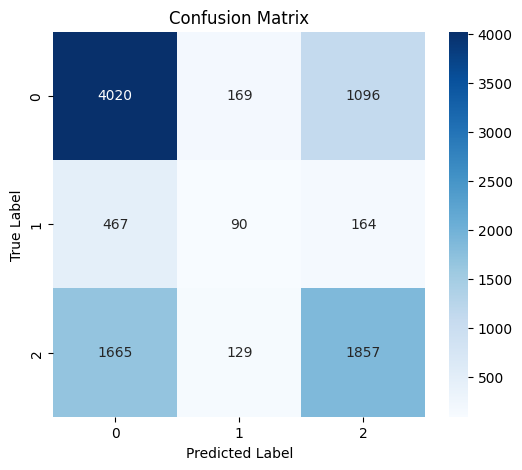

In [ ]:
#Using ANOVA feature selection due to its better performance in Logistic Regression
from sklearn.neighbors import KNeighborsClassifier


k =  7
anova_selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = anova_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = anova_selector.transform(X_test_scaled)


knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


selected_features = X_train_scaled.columns[anova_selector.get_support()]
print("Selected Features:", selected_features.tolist())

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Anova feature selection has no difference from the base model even with fewer best features therefore there is no effect

KNN may not be the best model. it still needs to work with a smaller dataset with fewer features

#### Support Vector Machine Model

##### Base Model

Accuracy: 0.6648
Recall: 0.45838266037540115
Precision: 0.44468079143545763
F1-score: 0.4440697146087426
Confusion Matrix:
 [[4526    0  759]
 [ 557    0  164]
 [1757    0 1894]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75      5285
           1       0.00      0.00      0.00       721
           2       0.67      0.52      0.59      3651

    accuracy                           0.66      9657
   macro avg       0.44      0.46      0.44      9657
weighted avg       0.62      0.66      0.63      9657



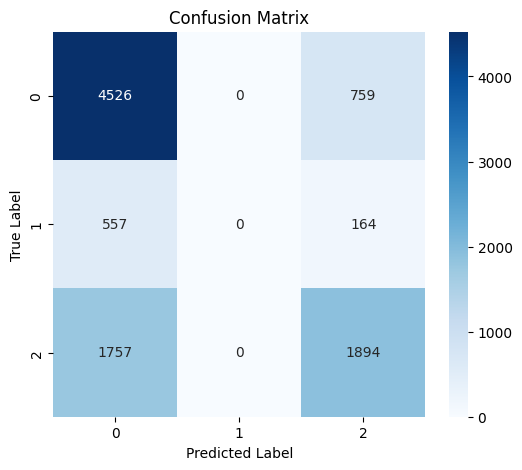

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_scaled, y_train)


y_pred = svm.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Support Vector Machine seems to be performing better than kNN with a better accuracy and with better values on the confusion matrix

Has performed poorly on class 1 and worse on the metrics on precision, recall and f1-score.

Parameter tuning and weights could help improve the model.



##### Tuned Model

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif,RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

k = 10
anova_selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = anova_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = anova_selector.transform(X_test_scaled)


svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_selected, y_train)


y_pred = svm.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


selected_features = X_train_scaled.columns[anova_selector.get_support()]
print("Selected Features:", selected_features.tolist())

Accuracy: 0.6428
Recall: 0.4472696921852646
Precision: 0.42510239408500156
F1-score: 0.4327036808980605
Confusion Matrix:
 [[4234    0 1051]
 [ 575    0  146]
 [1677    0 1974]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72      5285
           1       0.00      0.00      0.00       721
           2       0.62      0.54      0.58      3651

    accuracy                           0.64      9657
   macro avg       0.43      0.45      0.43      9657
weighted avg       0.59      0.64      0.61      9657

Selected Features: ['region_fe', 'lga_fe', 'ward_fe', 'region_code_fe', 'extraction_type_gravity', 'extraction_type_other', 'payment_type_never pay', 'quantity_group_enough', 'waterpoint_type_communal standpipe', 'waterpoint_type_other']


ANOVA does not seem to improve the model therefore the base model is better in accuracy terms only compared to other previous models

#### Decision tree

##### Base Model

In [ ]:
#Decision Trees model with scaled data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score,precision_score,f1_score


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)


y_pred = dt_model.predict(X_test_scaled)



Accuracy: 0.5250077663870767
Recall: 0.4221777387013801
Precision: 0.4164993679943709
F1-score: 0.415276402288862
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      5285
           1       0.11      0.14      0.12       721
           2       0.50      0.59      0.54      3651

    accuracy                           0.53      9657
   macro avg       0.42      0.42      0.42      9657
weighted avg       0.55      0.53      0.53      9657



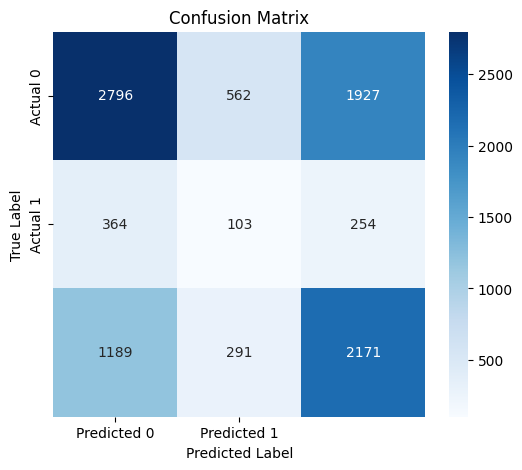

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")


print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Deision trees performs poorly with scaled data and worse on all other metrics

Accuracy: 0.7087
Recall: 0.5040712356811247
Precision: 0.6712095913323161
F1-score: 0.513635121893966
Confusion Matrix:
 [[4959   32  312]
 [ 580   53   67]
 [1803   19 1832]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.94      0.78      5303
           1       0.51      0.08      0.13       700
           2       0.83      0.50      0.62      3654

    accuracy                           0.71      9657
   macro avg       0.67      0.50      0.51      9657
weighted avg       0.72      0.71      0.68      9657



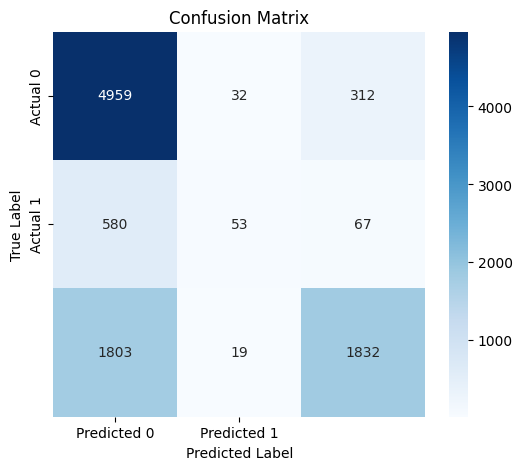

In [ ]:
#Decision trees without scaled data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_merge_encoded.drop(columns=['id','date_recorded','status_group_e'])
y = df_merge_encoded["status_group_e"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Model performs significantly better without scaled data with an accuracy of 70%. So far the best performing model

Precision, recall are above 50% which is more improved however still poor, with precision having a higher percentage

Class 1 prediction is significantly improved in this model compared to the others

Lesser confusion between class 0 and 2

Hyper parameter tuning may improve the model

##### Tuned Model

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.7087
Recall: 0.6638614564231164
Precision: 0.6019922189729064
F1-score: 0.5781390894136491
Confusion Matrix:
 [[4959   32  312]
 [ 580   53   67]
 [1803   19 1832]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.94      0.78      5303
           1       0.51      0.08      0.13       700
           2       0.83      0.50      0.62      3654

    accuracy                           0.71      9657
   macro avg       0.67      0.50      0.51      9657
weighted avg       0.72      0.71      0.68      9657



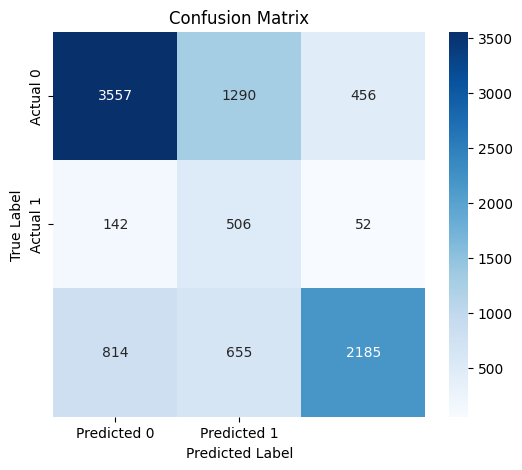

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}


dt_model_tuned = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(dt_model_tuned, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)


best_dt_model = grid_search.best_estimator_


y_pred_dt_tuned = best_dt_model.predict(X_test)


accuracy_dtt = accuracy_score(y_test, y_pred)
conf_matrix_dtt = confusion_matrix(y_test, y_pred)
class_report_dtt= classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Through hyper parameter tuning we have identified that gini is the best criterion to be used to classify the decision trees. No particular max depth and min sample split of 5 and leaves of 2.

By specifying the tree depth, minimum sample split and minimum leaves, the accuracy seems to have dropped but the most important parameters being precision recall and f1 score have significantly improved to an average of 57% considering f1 score

The confusion of class 2 and 0 has significantly reduced

This model can be considered however still needs large improvement to reach desirable values

Model performance worse after tuning, the data maybe overfitting due to many columns

#### Random Forest

##### Base Model

Accuracy: 0.806047426737082
Recall: 0.6777809406076424
Precision: 0.7315996154794431
F1-score: 0.6981399446806948
Confusion Matrix:
 [[4681  147  475]
 [ 335  261  104]
 [ 747   65 2842]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85      5303
           1       0.55      0.37      0.45       700
           2       0.83      0.78      0.80      3654

    accuracy                           0.81      9657
   macro avg       0.73      0.68      0.70      9657
weighted avg       0.80      0.81      0.80      9657



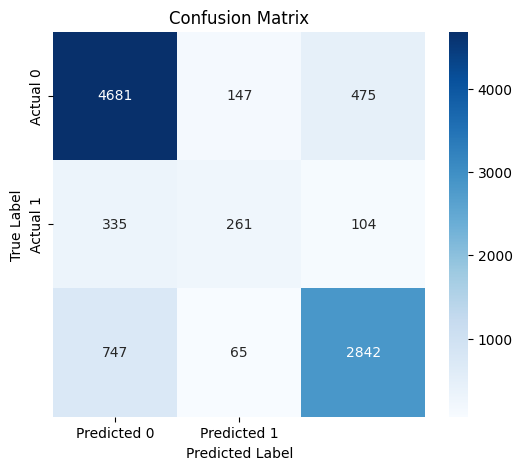

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

This is the best performing model with an accuracy of 80% and metrics of precision, recall and f1 score all above 67% which is highly desirable

Class 2 still has more confusion with class 0 but in terms of prediction class 0 is performing better

Class 1 has an overall f1 score of 45% which is better than all other models

##### Tuned Model

Accuracy: 0.6820958889924407
Recall: 0.6912039747272244
Precision: 0.6384371235154312
F1-score: 0.6074319210937295
Confusion Matrix:
 [[3914 1179  210]
 [ 148  523   29]
 [ 904  600 2150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      5303
           1       0.23      0.75      0.35       700
           2       0.90      0.59      0.71      3654

    accuracy                           0.68      9657
   macro avg       0.64      0.69      0.61      9657
weighted avg       0.79      0.68      0.71      9657



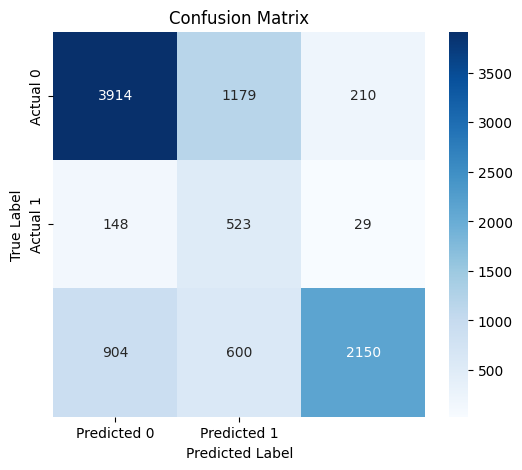

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix



smote = SMOTE(sampling_strategy={1: int(np.sum(y == 1) * 2)}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight={0: 1, 1: 5, 2: 1},
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_resampled, y_train_resampled)


y_pred = rf.predict(X_test)

recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The goal for this tuning was to improve recall on class 1 in order to improve prediction of functional pumps that need repair which has shot up to 75%.

This would be the best model overall

#### Gradient Boost

##### Base Model

Accuracy: 0.7616
Recall: 0.5827322525352269
Precision: 0.7242735691666597
F1-score: 0.6097402628481183
Confusion Matrix:
 [[4915   52  336]
 [ 471  133   96]
 [1309   38 2307]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82      5303
           1       0.60      0.19      0.29       700
           2       0.84      0.63      0.72      3654

    accuracy                           0.76      9657
   macro avg       0.72      0.58      0.61      9657
weighted avg       0.77      0.76      0.74      9657



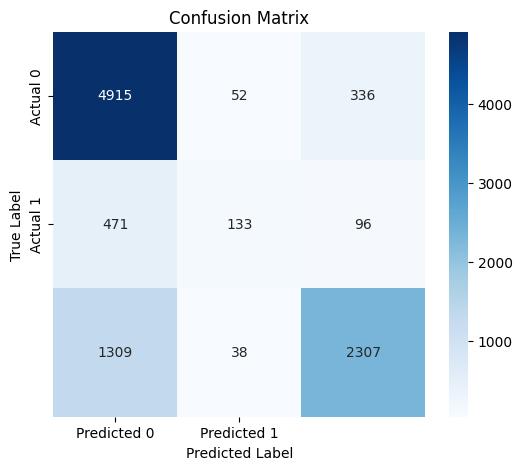

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)


y_pred = gbc.predict(X_test)

recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

good performance on the base model but not better than random forest

Focus on recall for the class 1 will help select the best model to go with


##### Tuned Model

Accuracy: 0.7616
Recall: 0.5827322525352269
Precision: 0.7242735691666597
F1-score: 0.6097402628481183
Confusion Matrix:
 [[4341  481  481]
 [ 256  357   87]
 [ 977  179 2498]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5303
           1       0.35      0.51      0.42       700
           2       0.81      0.68      0.74      3654

    accuracy                           0.75      9657
   macro avg       0.65      0.67      0.65      9657
weighted avg       0.76      0.75      0.75      9657



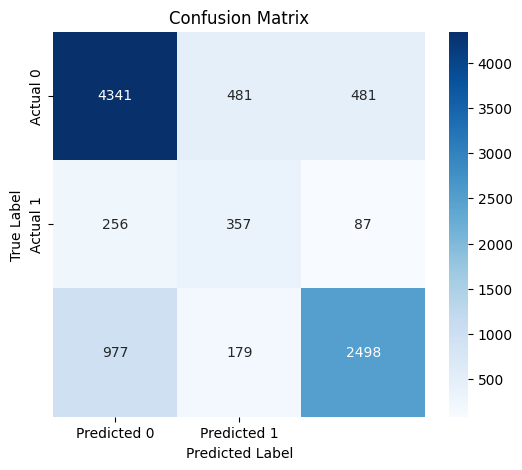

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


gb_clf = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)

gb_clf.fit(X_train_resampled, y_train_resampled)


y_probs = gb_clf.predict_proba(X_test)

recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

threshold = 0.35
y_pred = np.where(y_probs[:, 1] > threshold, 1, np.argmax(y_probs, axis=1))

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

A recall of 51% on class 1 has been achieved which is still not better than Random Forest but has performed averagely good

The best model is Random forest because it had accuracy = 80% on the base model but when tuned, the accuracy reduced to %  but with an increased recall of 75% on class 1 - wells that need repair

## Model evaluation

The best performing model was the tuned Random forest model with 75 % recall on class 1 which is the functonal needs repair.

Focus on this metric will help increase repairs on faulty wells by early detection.

Better tuning will increase the overall performance.

All other models had very low performance on accuracy and recall and will not be best suited for this dataset

## Conclusion  & Recommendation

- Proper cleaning has ensured proper models
- The best model was a Random Forest model with 75% recall on the functional needs repair class

- A lot more tuning could be done to improve the model. The shorter timelines have reduced the parameter tuning

- Random Forest, Gradient Boost and Decision trees have better classification than KNN, SVM and Logistic regression since they can handle larger datasets and more complex variables while still maintaining the balance between variance and bias

- Limitations experienced were; shorter timelines and some tuning models eg REF have a very long computation time and therefore affect delivery time as well as time to process other models
